In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

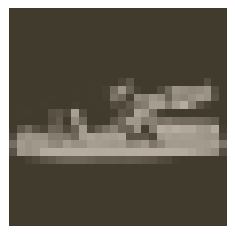

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

In [4]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

In [ ]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    else:
        print(f"Training loss: {running_loss})")
        

Training loss: 478.5995887070894)
Training loss: 366.0257857963443)
Training loss: 332.8351129963994)
Training loss: 312.95698219537735)
Training loss: 290.4961412027478)
Training loss: 285.45220621675253)
Training loss: 271.02334631979465)
Training loss: 263.56902781128883)
Training loss: 256.0787122771144)


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper



dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)


ps = F.softmax(logits,dim = 1)

helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')